# Input Ranges

# Input Ranges

| ID      | Name                | Range / Units                |
|---------|---------------------|------------------------------|
| FBFM40  | fuel_model          | [1, 40] (fuel model code)    |
| X_IGN   | x_ignition          | [-960, 960] (meters)         |
| Y_IGN   | y_ignition          | [-960, 960] (meters)         |
| SLP     | slope               | [0, 45] (degrees)            |
| ASP     | aspect              | [0, 360] (degrees)           |
| WS      | wind_speed          | [0, 30] (mph)                |
| WD      | wind_direction      | [0, 360] (degrees)           |
| M1      | m1_moisture         | [2, 40] (%)                  |
| M10     | m10_moisture        | [2, 40] (%)                  |
| M100    | m100_moisture       | [2, 40] (%)                  |
| CC      | canopy_cover        | [0, 100] (%)                 |
| CH      | canopy_height       | [0, 5] (integer, 10m units)  |
| CBH     | canopy_base_height  | [0, min(3, canopy_height)] (integer, 10m units) |
| CBD     | canopy_bulk_density | [0, 40] (100 kg/m³)          |
| MLH     | live_herbaceous     | [30, 100] (%)                |
| MLW     | live_woody          | [30, 100] (%)                |
| DEM     | elevation           | [0, 0] (meters, constant)    |

_Elevation, adjustment factor, and initial phi value are held constant._

Elevation, adjustment factor, and initial phi value all held constant

In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib import cm

import analysis_fcns

import glob
import rasterio

# get the num of cases in ./cases
cases = glob.glob('./cases/*')
num_cases = len(cases)

In [2]:
analysis_fcns.print_all_cases_info(num_cases)

Case 1 path: ./cases/case_1
./cases/case_1/flin_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=-9999.0
./cases/case_1/time_of_arrival_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=-9999.0
./cases/case_1/vs_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=-9999.0
Case 2 path: ./cases/case_2
./cases/case_2/flin_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=-9999.0
./cases/case_2/time_of_arrival_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=-9999.0
./cases/case_2/vs_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=-9999.0
Case 3 path: ./cases/case_3
./cases/case_3/flin_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=6.027480602264404
./cases/case_3/time_of_arrival_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=259980.0
./cases/case_3/vs_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=0.6517072319984436
Case 4 path: ./cases/case_4
./cases/case_4/flin_0000001_0259980.tif: shape=(128, 128), min=-9999.0, max=-9999.0

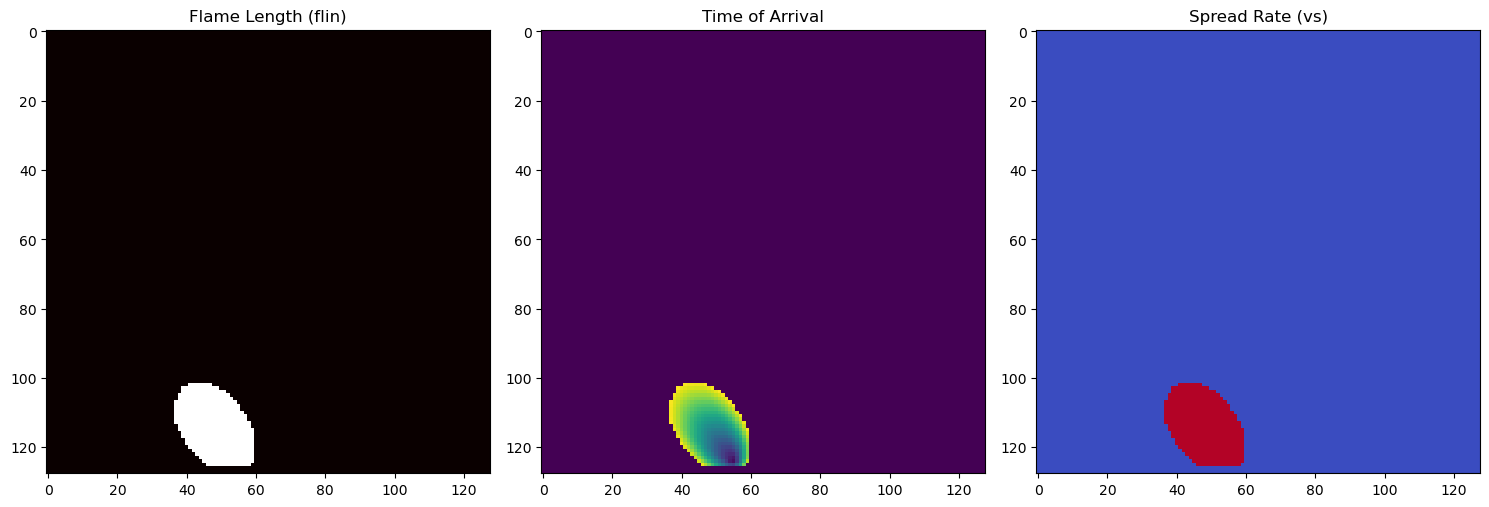

In [3]:
analysis_fcns.plot_case(3)

Plotting all cases for raster pattern: flin_*.tif


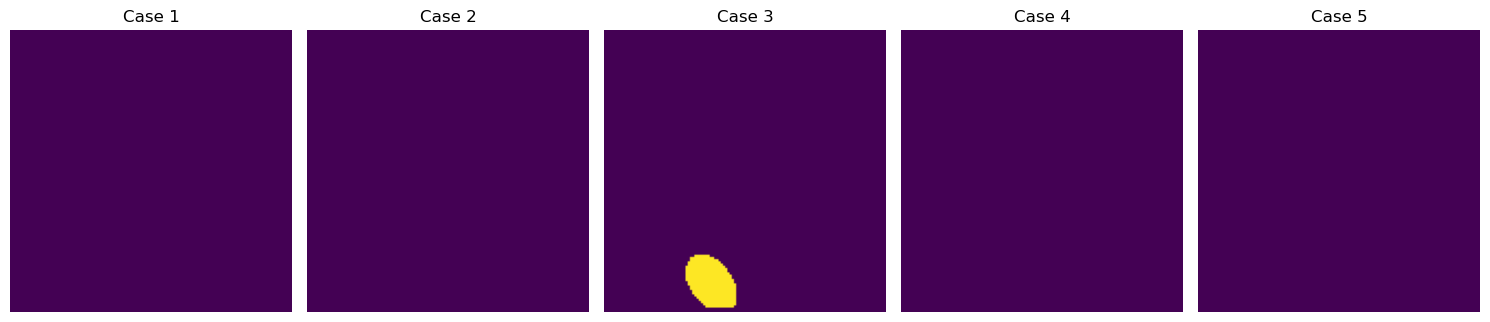

In [4]:
patterns = ["flin_*.tif", "time_of_arrival_*.tif", "vs_*.tif"]
analysis_fcns.plot_all_cases_raster('flin_*.tif', num_cases)

Input parameters distribution from input_tracking.txt:
              run         xign         yign         fuel          slp  \
count  1022.00000  1022.000000  1022.000000  1022.000000  1022.000000   
mean    511.50000    -8.958121    10.534344    20.596869    22.525440   
std     295.17029  1107.231505  1111.362819    11.343100    13.249465   
min       1.00000 -1919.800000 -1918.200000     1.000000     0.000000   
25%     256.25000  -961.225000  -954.000000    11.000000    11.000000   
50%     511.50000    11.200000    21.000000    21.000000    22.000000   
75%     766.75000   971.200000   991.950000    30.000000    34.000000   
max    1022.00000  1917.700000  1919.100000    40.000000    45.000000   

               asp           ws           wd           m1          m10  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean    178.975538    15.053620   179.797554    21.061252    20.838943   
std     105.286338     9.042313   104.791785    10.949282    10.9

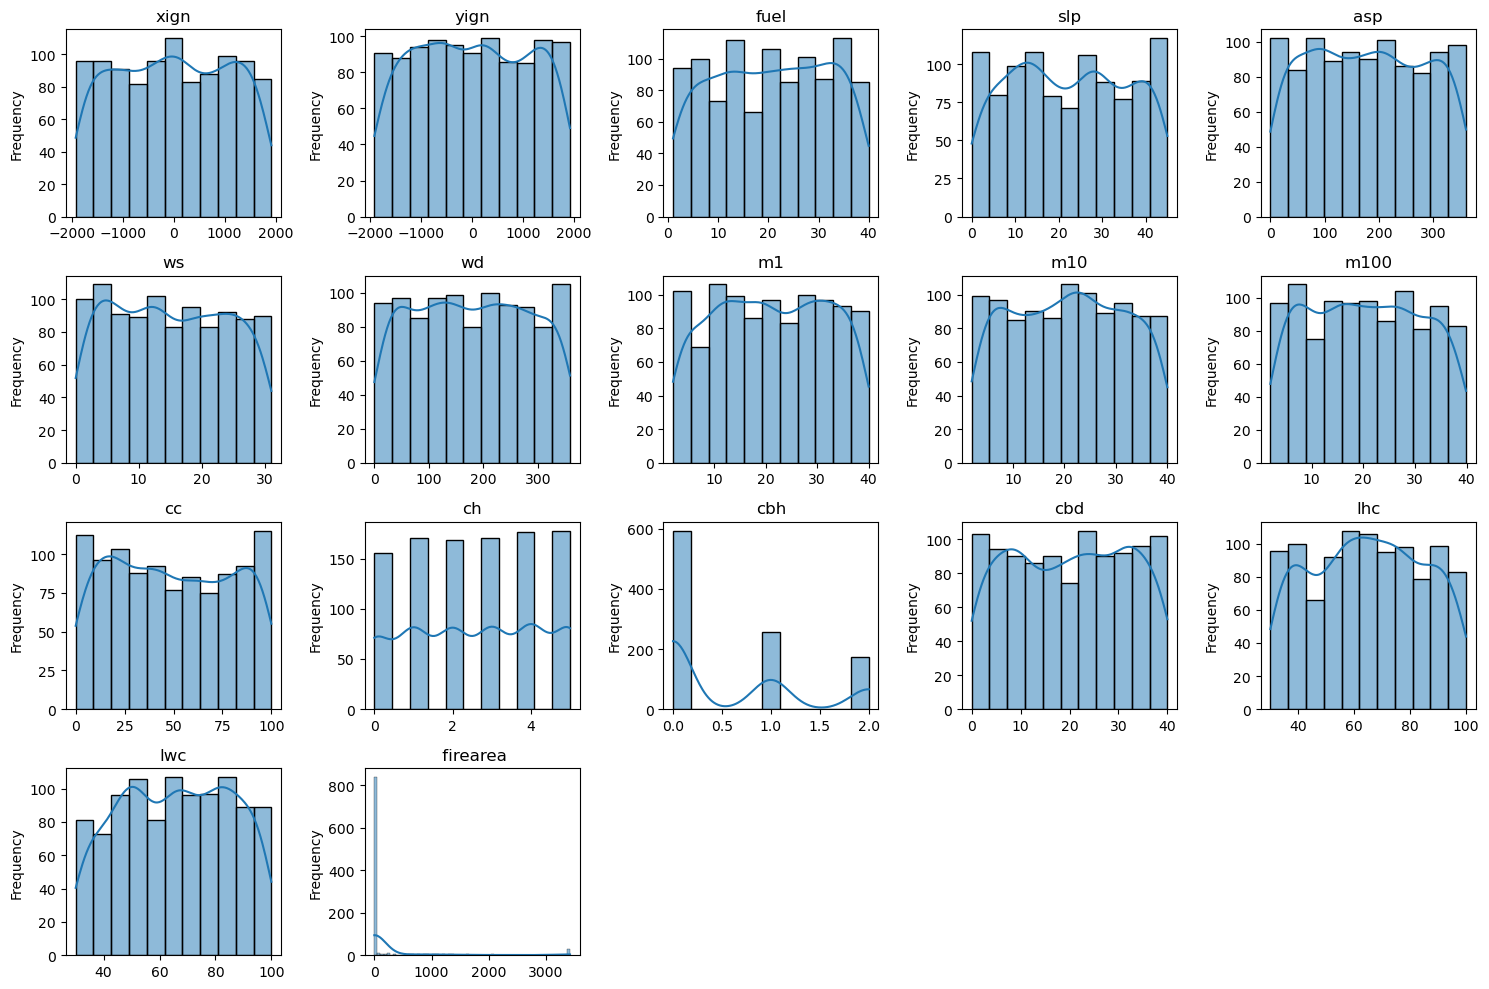

In [5]:
analysis_fcns.plot_input_distribution()

Input parameters vs Run number from input_tracking.txt:
              run         xign         yign         fuel          slp  \
count  1022.00000  1022.000000  1022.000000  1022.000000  1022.000000   
mean    511.50000    -8.958121    10.534344    20.596869    22.525440   
std     295.17029  1107.231505  1111.362819    11.343100    13.249465   
min       1.00000 -1919.800000 -1918.200000     1.000000     0.000000   
25%     256.25000  -961.225000  -954.000000    11.000000    11.000000   
50%     511.50000    11.200000    21.000000    21.000000    22.000000   
75%     766.75000   971.200000   991.950000    30.000000    34.000000   
max    1022.00000  1917.700000  1919.100000    40.000000    45.000000   

               asp           ws           wd           m1          m10  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean    178.975538    15.053620   179.797554    21.061252    20.838943   
std     105.286338     9.042313   104.791785    10.949282    10.

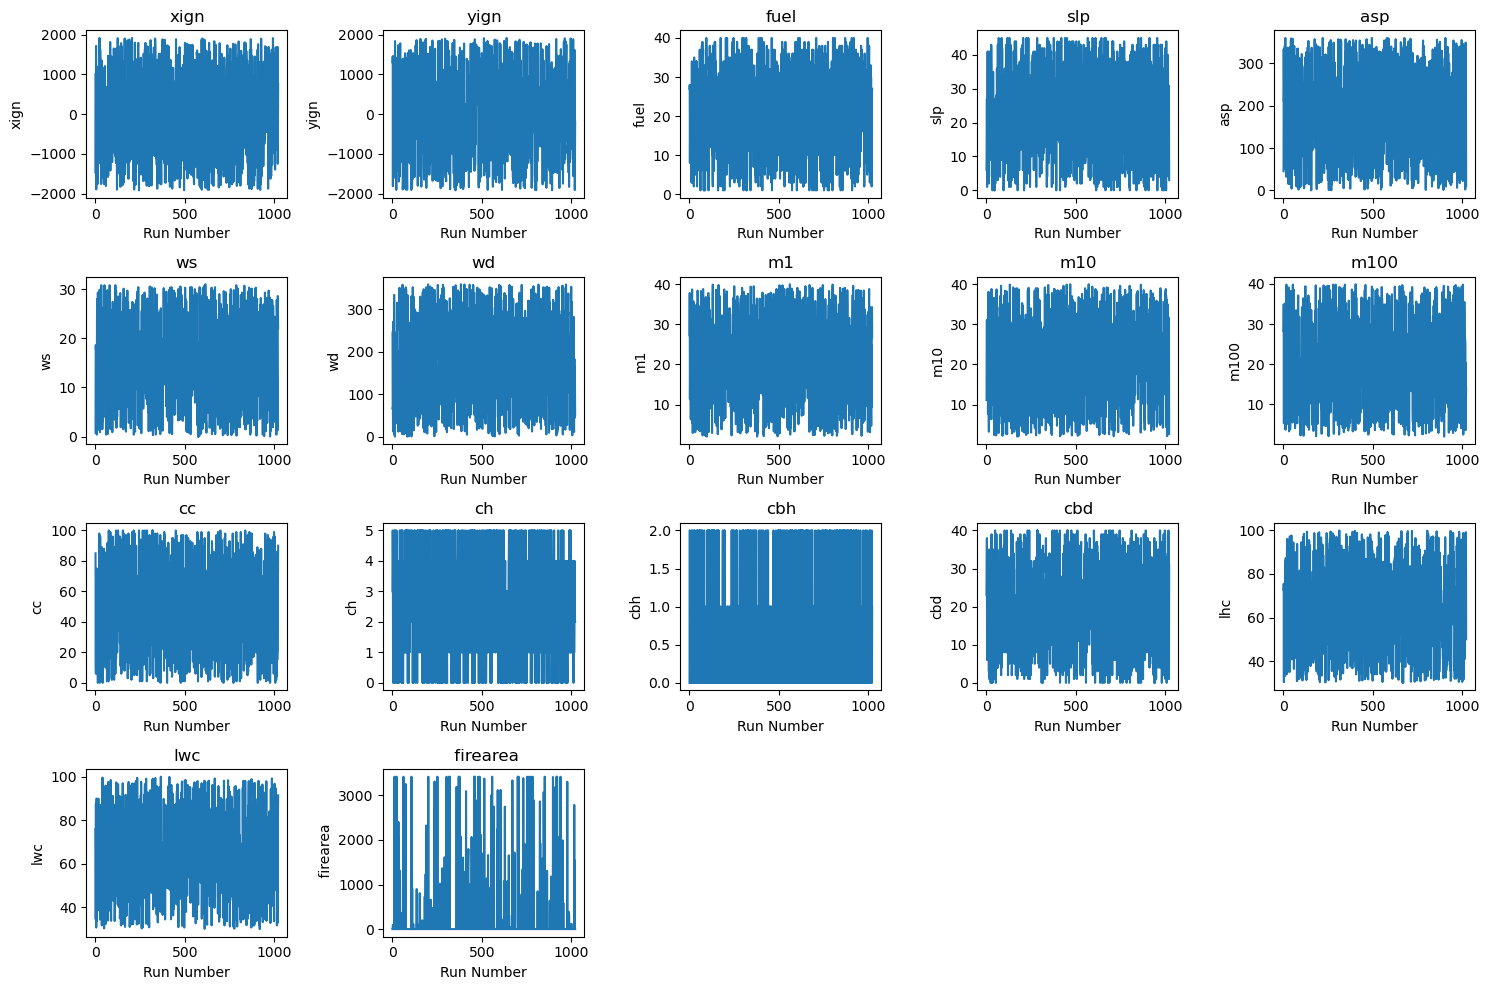

In [6]:
analysis_fcns.plot_input_vs_run()

In [7]:
# quick check to make sure all of the input parameters are within the expected ranges
analysis_fcns.check_input_ranges()


Checking input parameter ranges from input_tracking.txt:
Index(['run', 'xign', 'yign', 'fuel', 'slp', 'asp', 'ws', 'wd', 'm1', 'm10',
       'm100', 'cc', 'ch', 'cbh', 'cbd', 'lhc', 'lwc', ' firearea'],
      dtype='object')
xign is not a recognized input parameter.
yign is not a recognized input parameter.
fuel values are within the expected range: 1 to 40
slp values are within the expected range: 0 to 45
asp values are within the expected range: 0 to 360
ws values are within the expected range: 0 to 31
wd values are within the expected range: 0.0 to 360.0
m1 values are within the expected range: 1.0 to 40.0
m10 values are within the expected range: 1.0 to 40.0
m100 values are within the expected range: 1.0 to 40.0
cc values are within the expected range: 0 to 100
ch values are within the expected range: 0 to 5
cbh values are within the expected range: 0 to 2
cbd values are within the expected range: 0 to 40
lhc values are within the expected range: 30.0 to 100.0
lwc values are within

Analyzing fire area from it_scratch_fixed.txt:
Fire area statistics:
count     5.000000
mean     18.900000
std      42.261685
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      94.500000
Name: firearea, dtype: float64


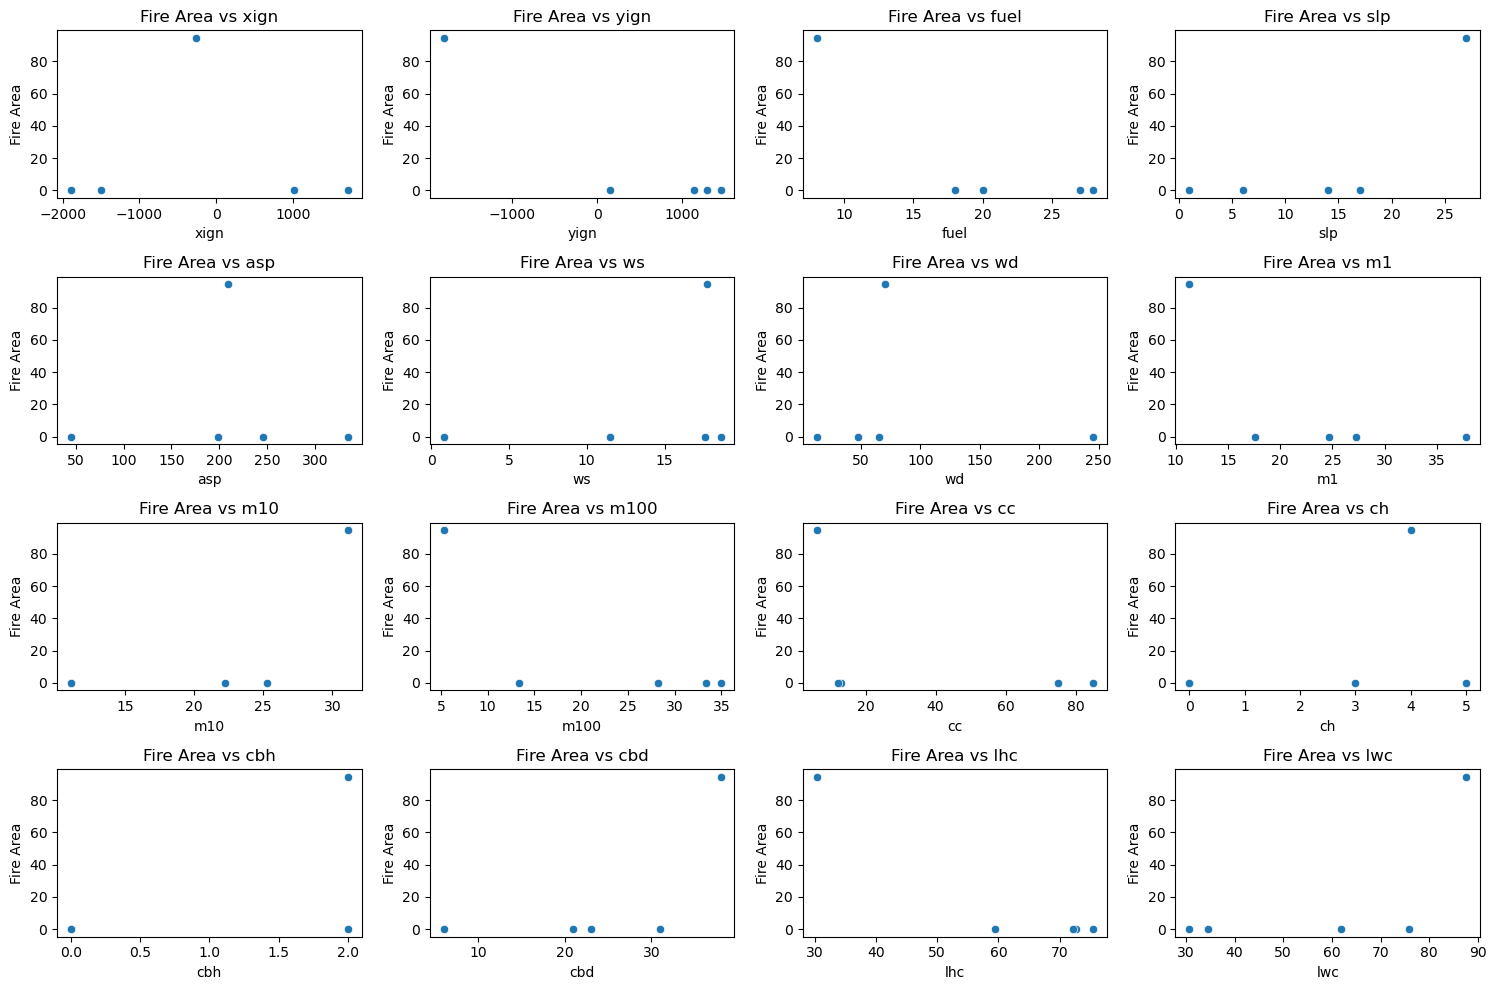

In [2]:
# analyze fire area
analysis_fcns.analyze_fire_area()

In [9]:
analysis_fcns.fire_area_covariance()

Calculating fire area covariance from it_scratch_fixed.txt:
Covariance between fire area and xign: -1709.0325000000014
Covariance between fire area and yign: -53425.1025
Covariance between fire area and fuel: -288.22499999999997
Covariance between fire area and slp: 330.75
Covariance between fire area and asp: 56.700000000000024
Covariance between fire area and ws: 105.36749999999998
Covariance between fire area and wd: -428.5574999999999
Covariance between fire area and m1: -293.895
Covariance between fire area and m10: 258.45750000000004
Covariance between fire area and m100: -418.63499999999993
Covariance between fire area and cc: -760.725
Covariance between fire area and ch: 37.8
Covariance between fire area and cbh: 28.35
Covariance between fire area and cbd: 335.475
Covariance between fire area and lhc: -749.3849999999999
Covariance between fire area and lwc: 696.4649999999999


{'xign': np.float64(-1709.0325000000014),
 'yign': np.float64(-53425.1025),
 'fuel': np.float64(-288.22499999999997),
 'slp': np.float64(330.75),
 'asp': np.float64(56.700000000000024),
 'ws': np.float64(105.36749999999998),
 'wd': np.float64(-428.5574999999999),
 'm1': np.float64(-293.895),
 'm10': np.float64(258.45750000000004),
 'm100': np.float64(-418.63499999999993),
 'cc': np.float64(-760.725),
 'ch': np.float64(37.8),
 'cbh': np.float64(28.35),
 'cbd': np.float64(335.475),
 'lhc': np.float64(-749.3849999999999),
 'lwc': np.float64(696.4649999999999)}

Calculating fire area correlation from it_scratch_fixed.txt:
Correlation coefficients with fire area:
run     1.329179e-17
xign   -2.598339e-02
yign   -9.267291e-01
fuel   -8.446194e-01
slp     7.768193e-01
asp     1.279769e-02
ws      3.321248e-01
wd     -1.116048e-01
m1     -6.921955e-01
m10     6.897774e-01
m100   -7.596337e-01
cc     -4.685779e-01
ch      3.885143e-01
cbh     6.123724e-01
cbd     6.599015e-01
lhc    -9.436371e-01
lwc     6.579770e-01
Name: firearea, dtype: float64


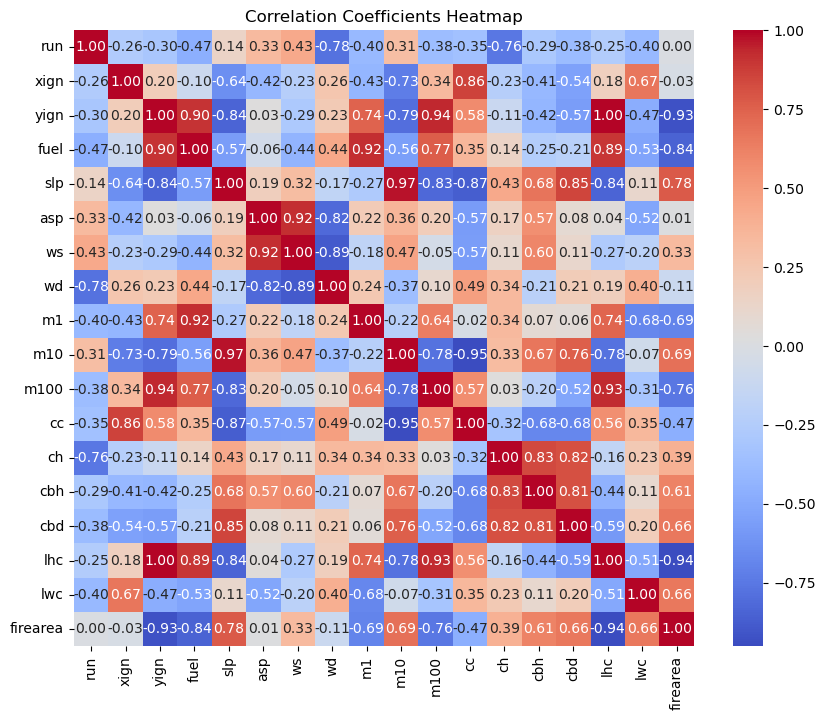

In [3]:
analysis_fcns.fire_area_correlation()

Plotting top 15 cases with the most fire area from input_tracking.txt (excluding fire area == 3419.5):
Top 15 cases with the most fire area:
     run  firearea
61    62    3419.1
487  488    3418.0
897  898    3412.9
731  732    3386.6
513  514    3376.6
670  671    3337.5
235  236    3311.5
977  978    3306.3
74    75    3253.9
358  359    3189.1
908  909    3183.4
604  605    3122.2
588  589    3117.7
779  780    3103.7
411  412    3095.7
./cases/case_62
./cases/case_488
./cases/case_898
./cases/case_732
./cases/case_514
./cases/case_671
./cases/case_236
./cases/case_978
./cases/case_75
./cases/case_359
./cases/case_909
./cases/case_605
./cases/case_589
./cases/case_780
./cases/case_412


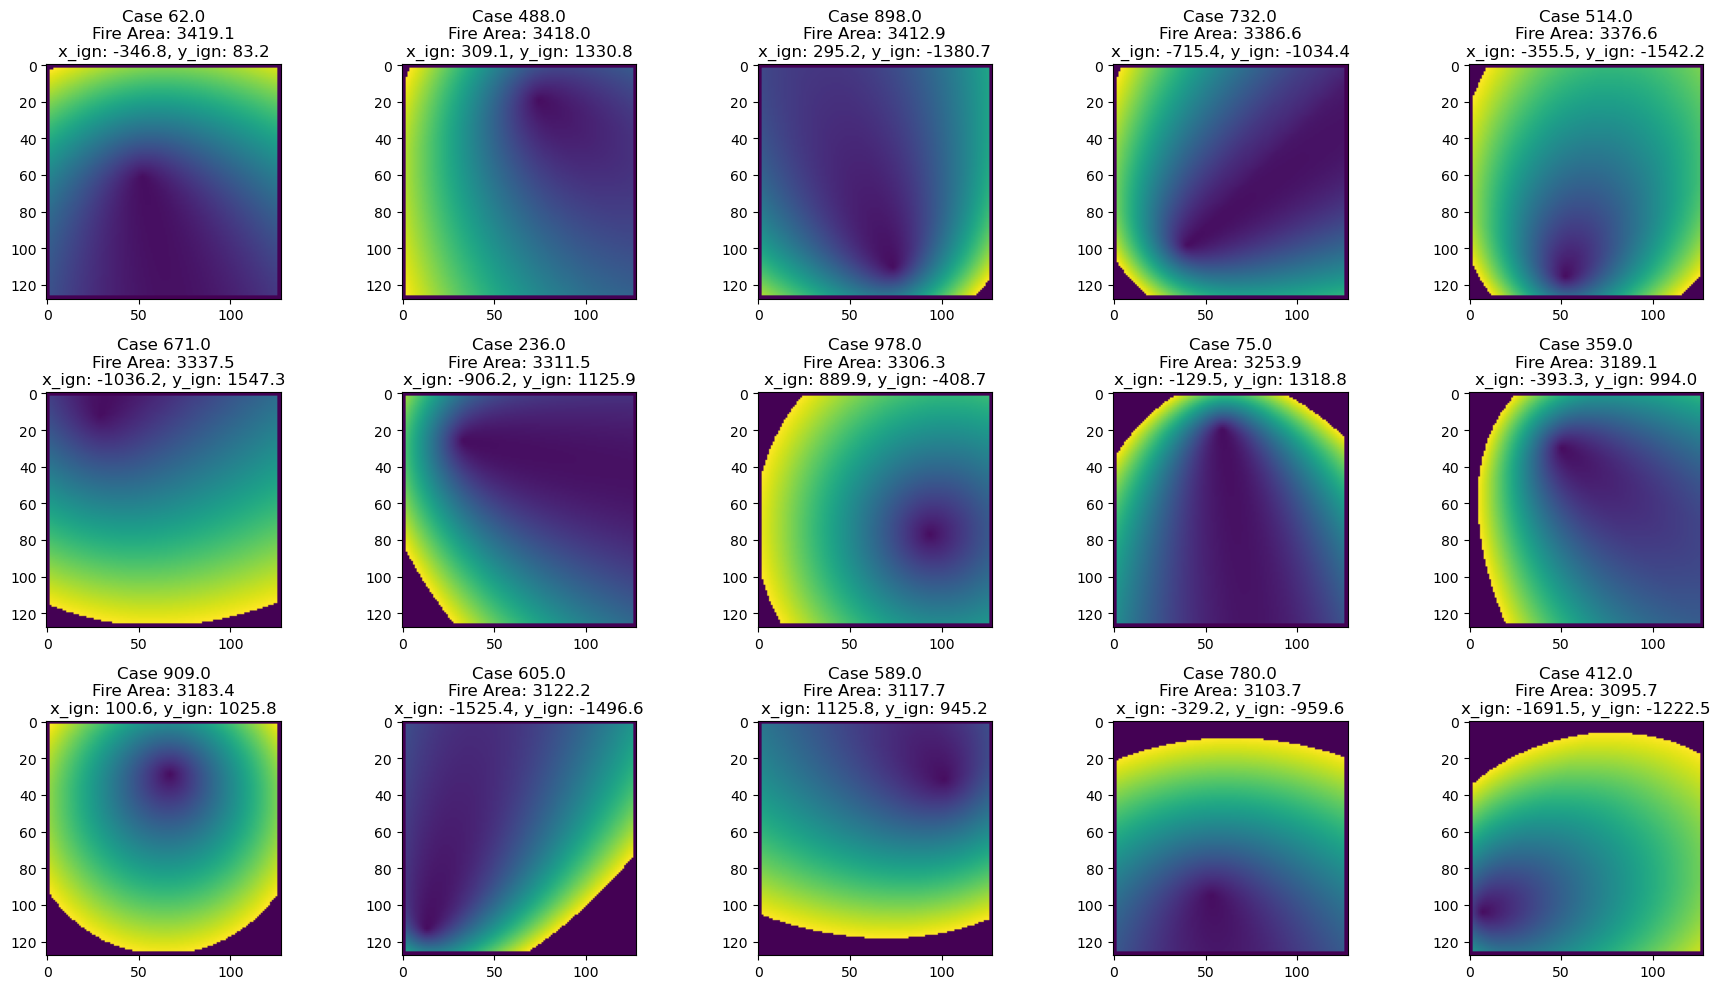

In [2]:
# select 15 cases that have the most fire area
import analysis_fcns
analysis_fcns.plot_top_fire_area_cases(15)

Plotting cases with zero fire area from input_tracking.txt:
Cases with <= 100 fire area:
       run    xign    yign  firearea
0        1  1011.1  1303.0       0.0
1        2 -1494.6  1458.5       0.0
2        3  -255.6 -1812.4      94.5
3        4  1716.9  1148.7       0.0
4        5 -1894.1   147.1       0.0
...    ...     ...     ...       ...
1015  1016  1250.8  -401.8       0.0
1017  1018  1694.4  1618.7       0.2
1019  1020 -1248.5 -1910.8       0.0
1020  1021    99.1  -806.6       0.0
1021  1022   764.0  -197.1       0.0

[845 rows x 4 columns]


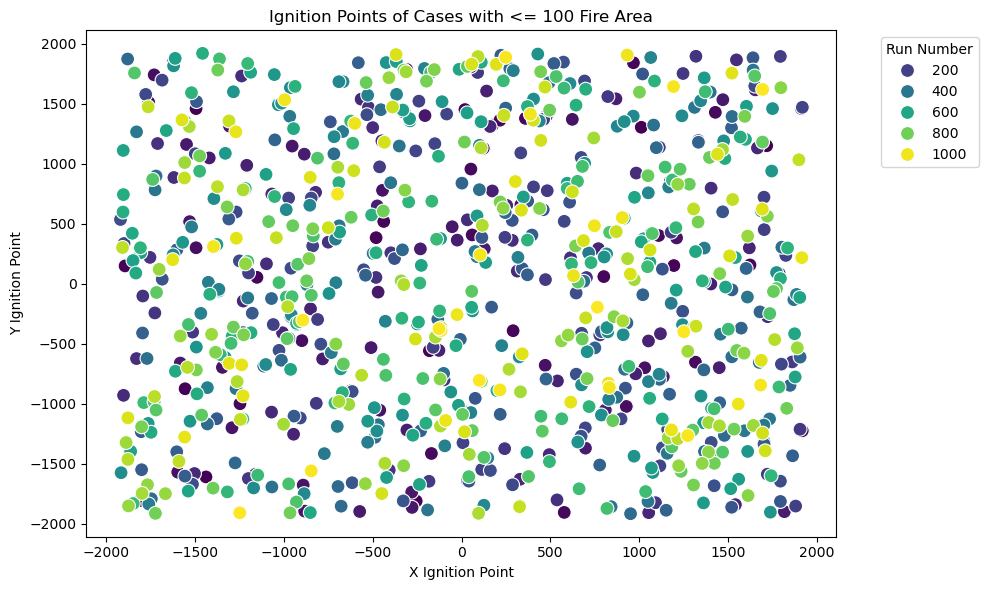

In [1]:
import analysis_fcns
analysis_fcns.plot_zero_fire_cases(firearea_threshold=100)

Plotting fire area against each input parameter from input_tracking.txt:


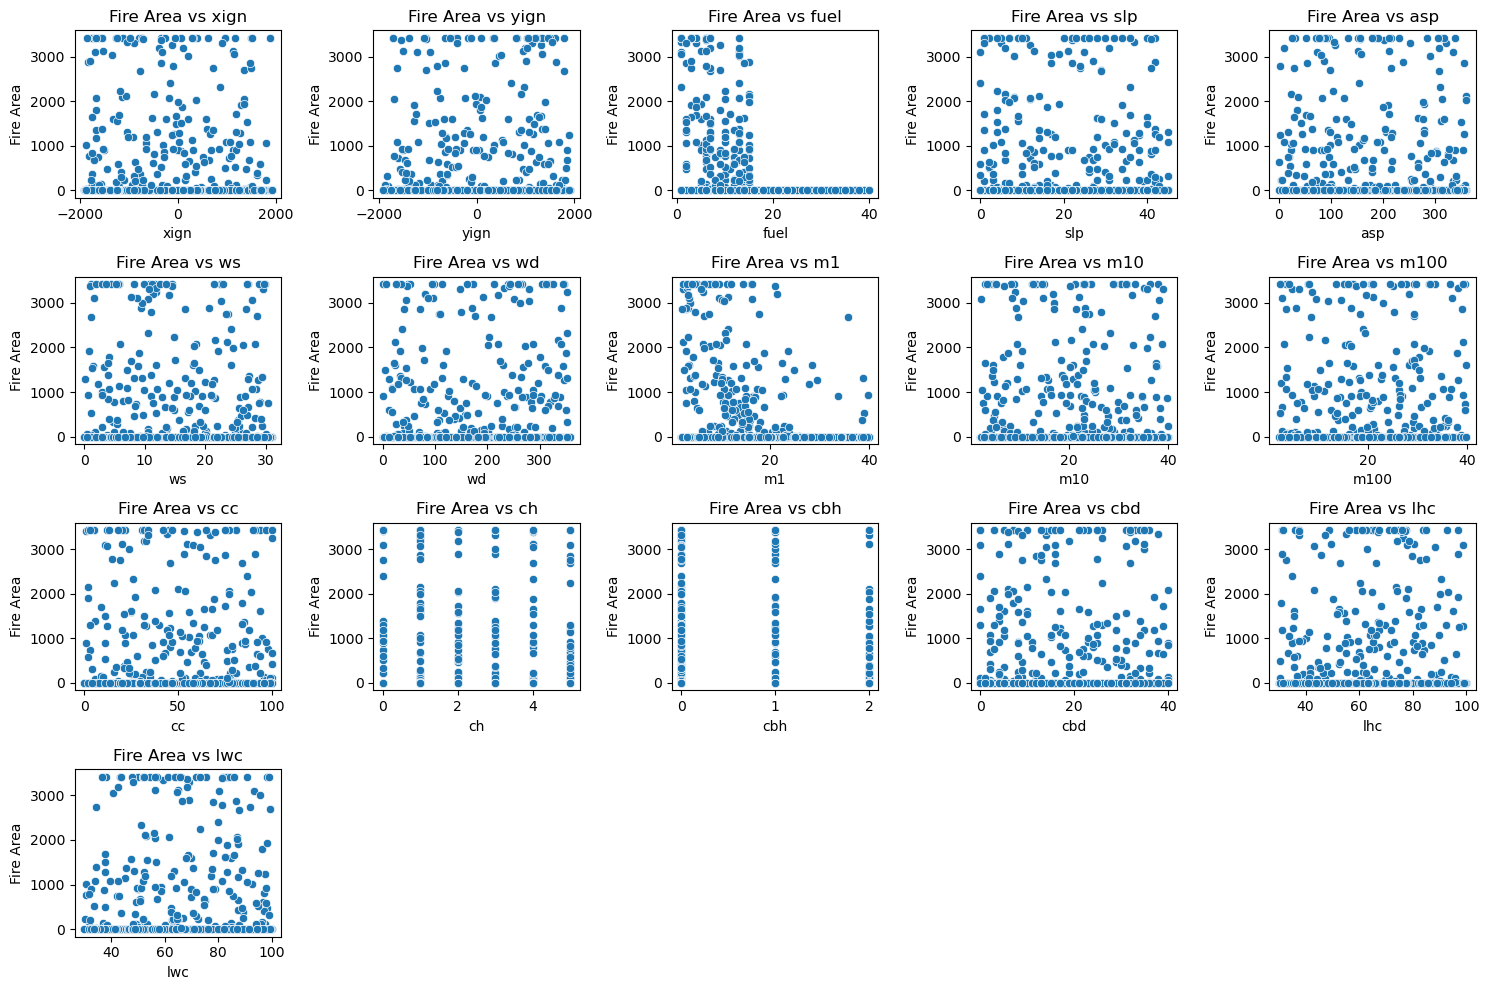

In [1]:
import analysis_fcns
analysis_fcns.plot_fire_area_vs_inputs()

In [1]:
import analysis_fcns
analysis_fcns.max_fuel_model_fire_area()

Finding maximum fuel model with fire area from input_tracking.txt:
Maximum fuel model with fire area > 0: 15


np.int64(15)

Plotting distribution of fuel for cases with fire area under 100 from input_tracking.txt:
Number of cases with fire area <= 100: 845


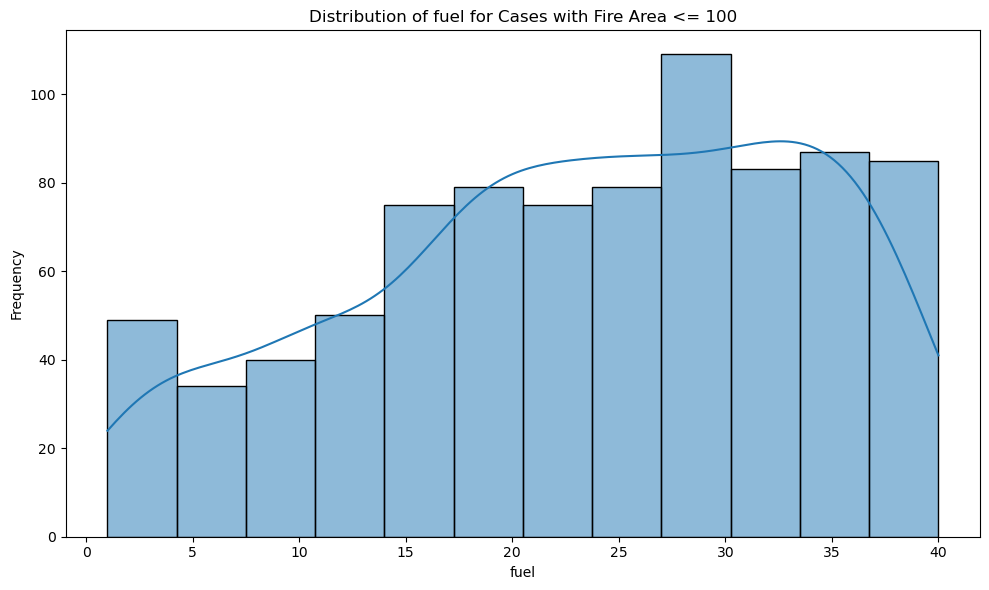

In [12]:
import analysis_fcns
analysis_fcns.plot_var_dist_for_firearea_underthreshold(variable='fuel',threshold=100)

Checking distribution of fuel model < 16 from input_tracking.txt:
Number of cases with fuel model < 16: 379


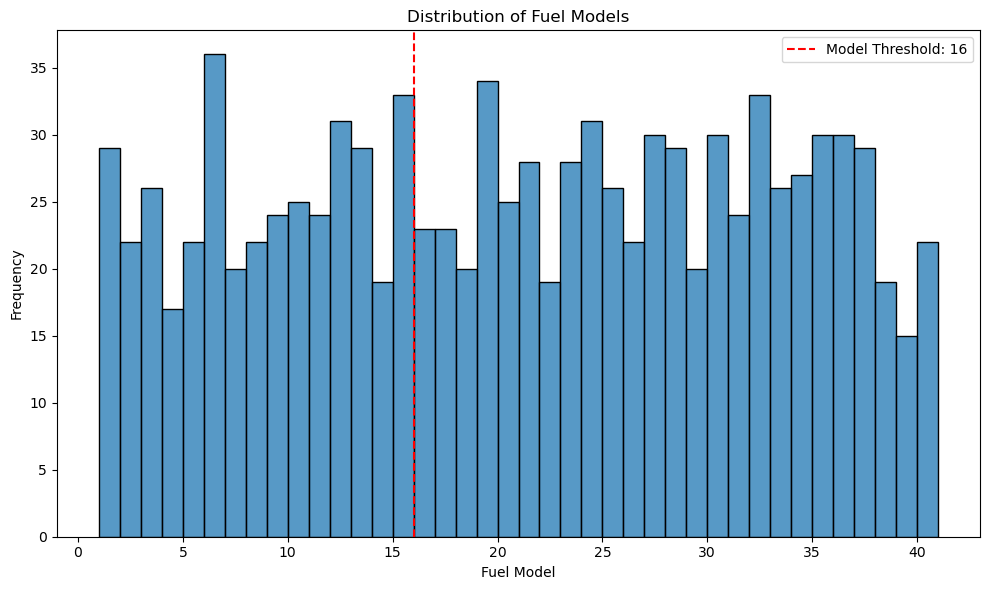

Total number of cases: 9712


In [1]:
# check how many cases there are with model < 16
import analysis_fcns
analysis_fcns.check_model_distribution(model_threshold=16)

Calculating average fire area per fuel model from input_tracking.txt:
Average fire area per fuel model:
    fuel     firearea
0    1.0  1351.544828
1    2.0   666.304545
2    3.0  1932.434615
3    4.0   990.400000
4    5.0   411.468182
5    6.0   859.180556
6    7.0  1470.005000
7    8.0    89.022727
8    9.0   525.854167
9   10.0   539.956000
10  11.0    91.466667
11  12.0   192.225806
12  13.0  1240.713793
13  14.0   379.594737
14  15.0   478.330303
15  16.0     0.000000
16  17.0     0.000000
17  18.0     0.000000
18  19.0     0.000000
19  20.0     0.000000
20  21.0     0.000000
21  22.0     0.000000
22  23.0     0.000000
23  24.0     0.000000
24  25.0     0.000000
25  26.0     0.000000
26  27.0     0.000000
27  28.0     0.000000
28  29.0     0.000000
29  30.0     0.000000
30  31.0     0.000000
31  32.0     0.000000
32  33.0     0.000000
33  34.0     0.000000
34  35.0     0.000000
35  36.0     0.000000
36  37.0     0.000000
37  38.0     0.000000
38  39.0     0.000000
39  40.0     0.0

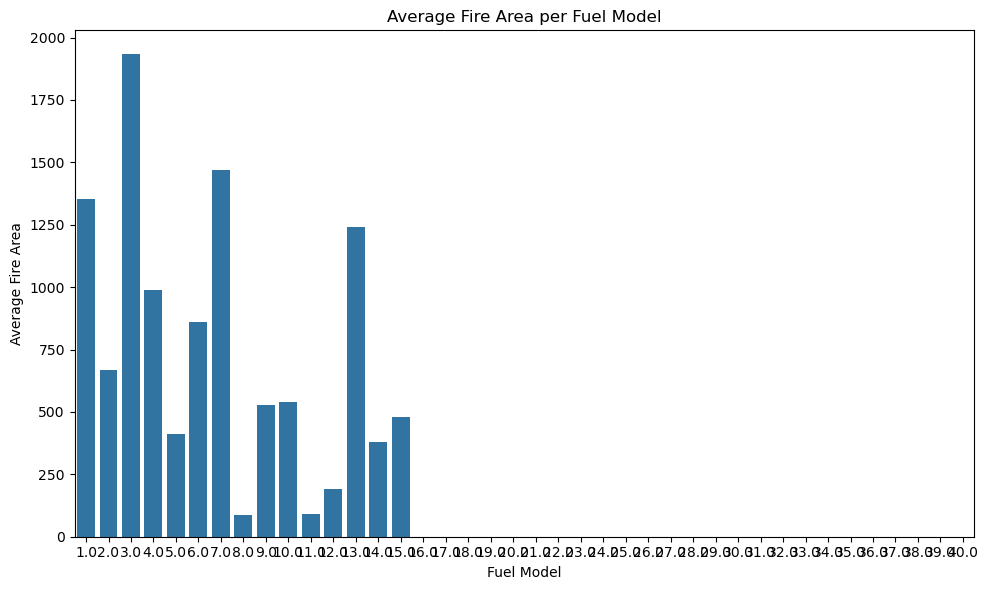

In [2]:
import analysis_fcns
analysis_fcns.average_fire_area_per_fuel_model()

In [2]:
import analysis_fcns
analysis_fcns.print_cases_with_fuel_model_less_than()

Printing cases with fuel model < 16 from input_tracking.txt:
Number of cases with fuel model < 16: 379
         run  fuel  firearea
2        3.0   8.0      94.5
5        6.0  10.0       2.7
10      11.0  13.0       0.2
11      12.0   3.0    3419.5
12      13.0  11.0       0.2
...      ...   ...       ...
1012  1013.0  14.0       0.2
1014  1015.0   9.0       0.2
1016  1017.0   6.0    2786.6
1017  1018.0  11.0       0.2
1018  1019.0   2.0    1541.9

[379 rows x 3 columns]
